In [1]:
# Dependencies
import requests
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

# import plotly.graph_objects as go
import datetime as DT
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# MAKE SURE THAT THE DATA IS ORGANIZED BY MOST RECENT ON TOP.

data = pd.read_csv("data/covid_race_data.csv")

positive_index = data.columns.get_loc("Positives") - 1
death_index = data.columns.get_loc("Deaths") - 1
negative_index = data.columns.get_loc("Negatives") - 1
last_index = negative_index + (negative_index - death_index)

data_df = data.iloc[:, np.r_[1:last_index]]

data_df = data_df.iloc[:, :-1]

data_df.columns = data_df.iloc[1]
data_df = data_df.rename(columns = {data_df.columns[0]: "State"})
data_df = data_df.drop([0,1])
data_df = data_df.drop_duplicates(subset = "State", keep = "first")

new_last_index = last_index-2

data_df
# positive_index, death_index, negative_index, last_index, new_last_index

1,State,Update Time,Source,Update Time (Et),Last Check,Checker,DC,Total,Known White,Known Black,...,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown
2,AK,NaN,NaN,5/27 14:15,5/27 22:16,JDL,BL,412,264,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,NaN,NaN,5/27 0:00,5/27 22:29,JDL,RV,16032,6273,6730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AR,NaN,NaN,5/27 19:13,5/27 22:43,JDL,RV,6277,3012,2194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AS,NaN,NaN,NaN,5/27 22:45,JDL,RV,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AZ,NaN,NaN,5/27 0:00,5/27 22:53,JDL,RV,17262,3548,555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CA,NaN,NaN,5/27 0:00,5/27 23:15,JDL,RV,98980,14640,3797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CO,NaN,NaN,5/27 0:00,5/27 23:20,JDL,RV,24767,8661,1483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CT,NaN,NaN,5/26 20:30,5/27 23:22,JDL,RV,41288,13951,5248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,DC,NaN,NaN,5/26 0:00,5/27 23:33,JDL,RV,8406,1293,3839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,DE,NaN,NaN,5/26 18:00,5/27 22:36,SPA,RV,9096,2645,2430,...,696,NaN,NaN,NaN,2679,10164,22%,3369,32792,10164


In [3]:
drop_columns = ["Update Time", "Source", "Last Check", "Checker", "DC"]

positive_df = data_df.iloc[:, np.r_[0:positive_index, positive_index:death_index]]
# positive_df = positive_df.iloc[:, :-1]
positive_df = positive_df.drop(drop_columns, axis = 1)

death_df = data_df.iloc[:, np.r_[0:positive_index, death_index:negative_index]]
# death_df = death_df.iloc[:, :-1]
death_df = death_df.drop(drop_columns, axis = 1)

# Note negatives data does not have a total column
negative_df = data_df.iloc[:, np.r_[0:positive_index, negative_index:new_last_index]]
# negative_df = negative_df.iloc[:, :-1]
negative_df = negative_df.drop(drop_columns, axis = 1)

In [4]:
race_pop_data = pd.read_csv("data/race_pop_data.csv")
race_pop_data_df = race_pop_data.iloc[:, 4:-1]

race_pop_us = pd.DataFrame(race_pop_data_df.sum()).T

race_pop_us.loc[[0], "State"] = "# US"
race_pop_us = race_pop_us.rename(columns = {"State": "ID"})

race_pop_us = race_pop_us[["ID", "Total", "Black", "Asian", "NHPI", "AIAN", "Two or more", "White", "Other"]]
race_pop_us

,ID,Total,Black,Asian,NHPI,AIAN,Two or more,White,Other
0,# US,322903030,40130920,17421159,549504,2264689,8490244,206723250,3391445


In [5]:
eth_pop_data = pd.read_csv("data/eth_pop_data.csv")
eth_pop_data_df = eth_pop_data.iloc[:, 4:-1]

eth_pop_us = pd.DataFrame(eth_pop_data_df.sum()).T

eth_pop_us.loc[[0], "State"] = "# US"
eth_pop_us = eth_pop_us.rename(columns = {"State": "ID"})

# pop_columns = pop_us.columns
eth_pop_us = eth_pop_us[["ID", "Total", "Hispanic", "Non-Hispanic"]]
eth_pop_us

,ID,Total,Hispanic,Non-Hispanic
0,# US,322903030,57517935,265385095


In [6]:
# https://www.census.gov/quickfacts/fact/table/US/PST045219
# US_pop = 328239523

# US_white_alone = .765
# US_white_nonHispanic = .604
# US_black = .134
# US_LatinX = 0
# US_AIAN = .013
# US_asian = .059
# US_NHPI = .002
# US_Multiracial = .027 
# US_Hispanic = .173
# US_NonHispanic =1 - US_Hispanic
# US_LatinX = US_Hispanic

# race_array = [1, US_white_nonHispanic, US_black, 
#               US_LatinX, US_asian, US_AIAN, US_NHPI, 
#               US_Multiracial, np.nan, np.nan, 
#               US_Hispanic, US_NonHispanic, np.nan]

# for each in race_array:
#     print (US_pop * each)

# Order of Array
# ['ID', 'Total', 'Known White ', 'Known Black ',
#        'Known LatinX / Hispanic', 'Known Asian', 'Known AIAN', 'Known NHPI',
#        'Known Multiracial ', 'Other', 'Unknown Race', 'Known Hispanic',
#        'Known Non-Hispanic', 'Unknown Ethnicity']

# Deaths

In [7]:
deaths_unknown_state = death_df[["State", "% Unk."]]
deaths_unknown_state.columns = ["State", "% Unknown Race", "% Unknown Ethnicity"]
deaths_unknown_state.fillna("100%", inplace = True)
deaths_unknown_state = deaths_unknown_state.set_index("State")
deaths_unknown_state['% Unknown Race'] = deaths_unknown_state['% Unknown Race'].str.rstrip('%').astype('float')
deaths_unknown_state['% Unknown Ethnicity'] = deaths_unknown_state['% Unknown Ethnicity'].str.rstrip('%').astype('float')
deaths_unknown_state = deaths_unknown_state.sort_values("% Unknown Ethnicity", ascending = False)
deaths_unknown_state = deaths_unknown_state.sort_values("% Unknown Race", ascending = False)
deaths_unknown_state

,% Unknown Race,% Unknown Ethnicity
State,,
WY,100.00,100.00
GU,100.00,100.00
AS,100.00,100.00
NM,100.00,100.00
PR,100.00,100.00
HI,100.00,100.00
UT,100.00,100.00
VI,100.00,100.00
MP,100.00,100.00


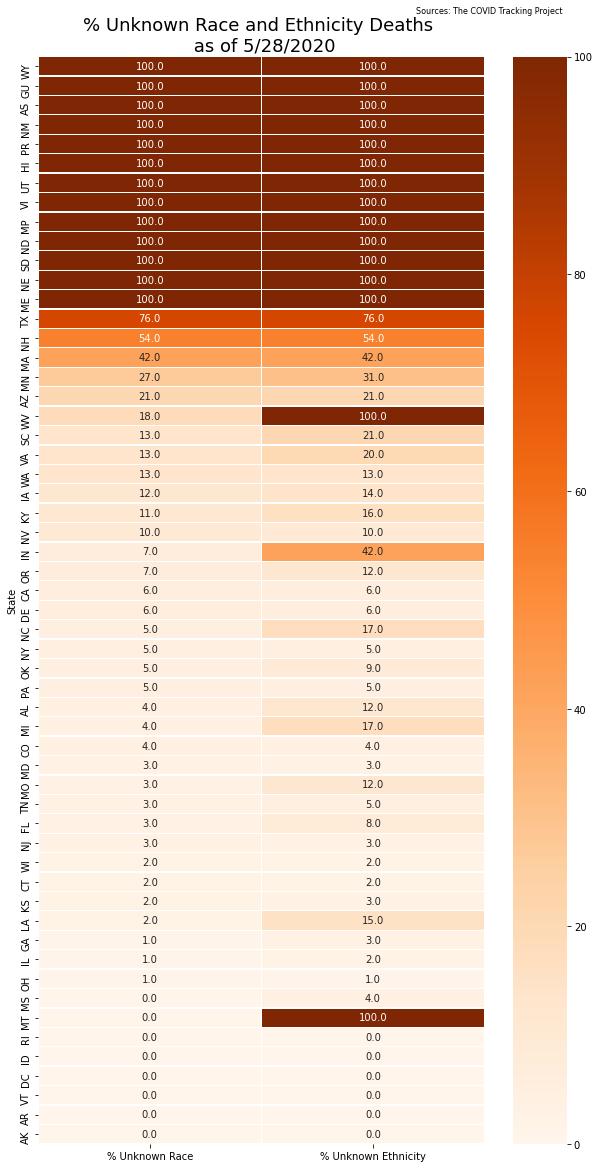

In [8]:
fig, ax = plt.subplots(figsize=(10,20))
title = "% Unknown Race and Ethnicity Deaths \n as of 5/28/2020"

plt.title(title, fontsize=18)

sns.heatmap(deaths_unknown_state, cmap = 'Oranges', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax)

# plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project"
plt.gcf().text(.65, .91, textstr, fontsize=8)

# textstr = "US Census Population Estimates"
# plt.gcf().text(.70, .90, textstr, fontsize=8)

# textstr = "Created by: Heain Yee"
# plt.gcf().text(.65, .89, textstr, fontsize=8)

plt.savefig("images/%UnknownDeaths")

plt.show()

In [9]:
deaths_states = death_df.copy()
deaths_states = deaths_states.drop(["State", "Update Time (Et)", "% Unk."], axis = 1)
deaths_states.fillna(0, inplace = True)

for column in deaths_states.columns:
    deaths_states[column] = deaths_states[column].astype('float')

new_col = ['Total',
 'White',
 'Black',
 'LatinX / Hispanic',
 'Asian',
 'AIAN',
 'NHPI',
 'Two or more',
 'Other',
 'Unknown Race',
 'Hispanic',
 'Non-Hispanic',
 'Unknown Ethnicity']

deaths_states.columns = new_col
deaths_states

# deaths_states = deaths_states[pop_columns[1:]]
# deaths_states
deaths_us = pd.DataFrame(deaths_states.sum()).T

deaths_us ["ID"] = ["# Known Deaths"]
cols = list(deaths_us.columns.values)
cols = cols[-1:] + cols[:-1]
deaths_us = deaths_us[cols]

deaths_us = deaths_us.append(pd.Series(), ignore_index=True)
deaths_us

,ID,Total,White,Black,LatinX / Hispanic,Asian,AIAN,NHPI,Two or more,Other,Unknown Race,Hispanic,Non-Hispanic,Unknown Ethnicity
0,# Known Deaths,"94,218.00","43,767.00","20,988.00","12,709.00","3,756.00",287.00,63.00,190.00,"3,421.00","8,939.00","13,565.00","68,630.00","10,334.00"
1,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
for element in race_pop_us.columns:
    values = (race_pop_us[element]).values
    deaths_us.loc[[1], element] = values[0]

for element in eth_pop_us.columns:
    values = (eth_pop_us[element]).values
    deaths_us.loc[[1], element] = values[0]

deaths_us = deaths_us.drop(["LatinX / Hispanic", "Unknown Race", "Unknown Ethnicity"], axis = 1)
    
deaths_us

,ID,Total,White,Black,Asian,AIAN,NHPI,Two or more,Other,Hispanic,Non-Hispanic
0,# Known Deaths,"94,218.00","43,767.00","20,988.00","3,756.00",287.00,63.00,190.00,"3,421.00","13,565.00","68,630.00"
1,# US,"322,903,030.00","206,723,250.00","40,130,920.00","17,421,159.00","2,264,689.00","549,504.00","8,490,244.00","3,391,445.00","57,517,935.00","265,385,095.00"


In [11]:
deaths_us = deaths_us.append({"ID": "% Known Deaths"}, ignore_index = True)
deaths_us = deaths_us.append({"ID": "% US"}, ignore_index = True)
deaths_us

,ID,Total,White,Black,Asian,AIAN,NHPI,Two or more,Other,Hispanic,Non-Hispanic
0,# Known Deaths,"94,218.00","43,767.00","20,988.00","3,756.00",287.00,63.00,190.00,"3,421.00","13,565.00","68,630.00"
1,# US,"322,903,030.00","206,723,250.00","40,130,920.00","17,421,159.00","2,264,689.00","549,504.00","8,490,244.00","3,391,445.00","57,517,935.00","265,385,095.00"
2,% Known Deaths,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,% US,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [12]:
for column in deaths_us.columns:
    if column != "ID":
        values = (deaths_us[column]/deaths_us['Total']).values
        deaths_us.loc[[2], column] = values[0]*100
        deaths_us.loc[[3], column] = values[1]*100

deaths_us

,ID,Total,White,Black,Asian,AIAN,NHPI,Two or more,Other,Hispanic,Non-Hispanic
0,# Known Deaths,"94,218.00","43,767.00","20,988.00","3,756.00",287.00,63.00,190.00,"3,421.00","13,565.00","68,630.00"
1,# US,"322,903,030.00","206,723,250.00","40,130,920.00","17,421,159.00","2,264,689.00","549,504.00","8,490,244.00","3,391,445.00","57,517,935.00","265,385,095.00"
2,% Known Deaths,100.00,46.45,22.28,3.99,0.30,0.07,0.20,3.63,14.40,72.84
3,% US,100.00,64.02,12.43,5.40,0.70,0.17,2.63,1.05,17.81,82.19


In [13]:
deaths_us_total = deaths_us["Total"][0]/deaths_us["Total"][1]*100000
deaths_us_total

deaths_us["Total"][0], deaths_us["Total"][1], deaths_us_total

(94218.0, 322903030.0, 29.178419292008503)

In [14]:
# i = 0
# for column in deaths_unknown_us.columns:
#     if column != "ID":
#         value = (deaths_unknown_us[column]/deaths_unknown_us['Total']).values[0]
#         deaths_unknown_us.loc[[2], column] = value*100
#         deaths_unknown_us.loc[[3], column] = race_array[i]*100
        
#         i = i+1
# deaths_unknown_us

In [15]:
deaths_us_T = deaths_us.copy()
deaths_us_T = deaths_us_T.T.rename_axis('ID').reset_index()

deaths_us_T.columns = deaths_us_T.iloc[0]
deaths_us_T = deaths_us_T.drop([0]).set_index("ID")
deaths_us_T = deaths_us_T.drop(["Total"])

deaths_us_T["Difference %"] = deaths_us_T["% US"]- deaths_us_T["% Known Deaths"]
deaths_us_T["Affected per 100000"] = deaths_us_T["# Known Deaths"]/deaths_us_T["# US"]*100000

deaths_us_T_percap = deaths_us_T[['# Known Deaths', '# US', 'Affected per 100000']]
deaths_us_T_percap = deaths_us_T_percap.sort_values("Affected per 100000", ascending = False)

deaths_us_T_rep = deaths_us_T[['% Known Deaths','% US','Difference %']]
deaths_us_T_rep = deaths_us_T_rep.sort_values("Difference %", ascending = False)

In [16]:
deaths_us_T_percap

,# Known Deaths,# US,Affected per 100000
ID,,,
Other,"3,421.00","3,391,445.00",100.87
Black,"20,988.00","40,130,920.00",52.30
Non-Hispanic,"68,630.00","265,385,095.00",25.86
Hispanic,"13,565.00","57,517,935.00",23.58
Asian,"3,756.00","17,421,159.00",21.56
White,"43,767.00","206,723,250.00",21.17
AIAN,287.00,"2,264,689.00",12.67
NHPI,63.00,"549,504.00",11.46
Two or more,190.00,"8,490,244.00",2.24


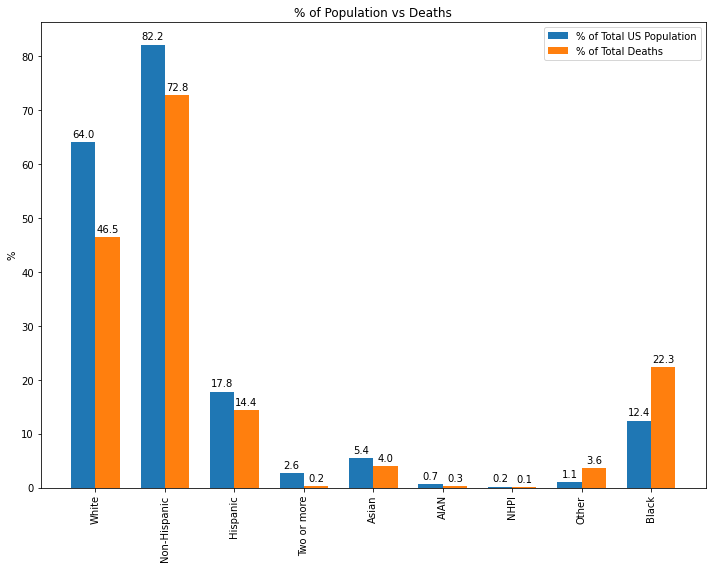

In [17]:
percent_chart = deaths_us_T.sort_values("Difference %", ascending = False).reset_index()
percent_chart

labels = percent_chart["ID"]
us = percent_chart["% US"]
positives = percent_chart["% Known Deaths"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, us, width, label='% of Total US Population')
rects2 = ax.bar(x + width/2, positives, width, label='% of Total Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% of Population vs Deaths')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("images/%PopulationvsDeaths")

plt.show()

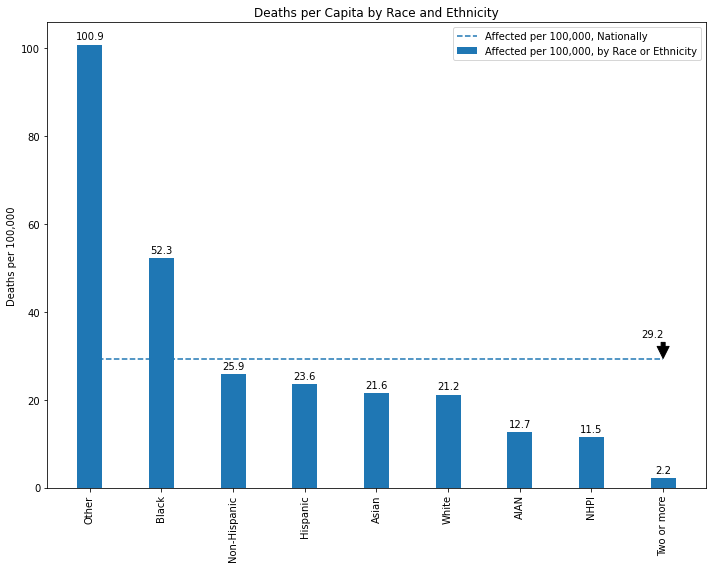

In [18]:
percap_chart = deaths_us_T.sort_values("Affected per 100000", ascending = False).reset_index()

labels = percap_chart["ID"]
affected = percap_chart["Affected per 100000"]

x = np.arange(len(labels))  # the label locations

y_mean = [deaths_us_total]*len(x)

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x, affected, width, label='Affected per 100,000, by Race or Ethnicity')
mean_line = ax.plot(x,y_mean, label='Affected per 100,000, Nationally', linestyle='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deaths per 100,000')
ax.set_title('Deaths per Capita by Race and Ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

ax.annotate('{:.1f}'.format(deaths_us_total),
            xy=(len(x)-1, deaths_us_total), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

fig.tight_layout()

plt.savefig("images/DeathsAffectedperCapita")

plt.show()

# Positive Cases

In [19]:
positive_unknown_state = positive_df[["State", "% Unk."]]
positive_unknown_state.columns = ["State", "% Unknown Race", "% Unknown Ethnicity"]
positive_unknown_state.fillna("100%", inplace = True)
positive_unknown_state = positive_unknown_state.set_index("State")
positive_unknown_state['% Unknown Race'] = positive_unknown_state['% Unknown Race'].str.rstrip('%').astype('float')
positive_unknown_state['% Unknown Ethnicity'] = positive_unknown_state['% Unknown Ethnicity'].str.rstrip('%').astype('float')
positive_unknown_state = positive_unknown_state.sort_values("% Unknown Ethnicity", ascending = False)
positive_unknown_state = positive_unknown_state.sort_values("% Unknown Race", ascending = False)
# positive_unknown_state

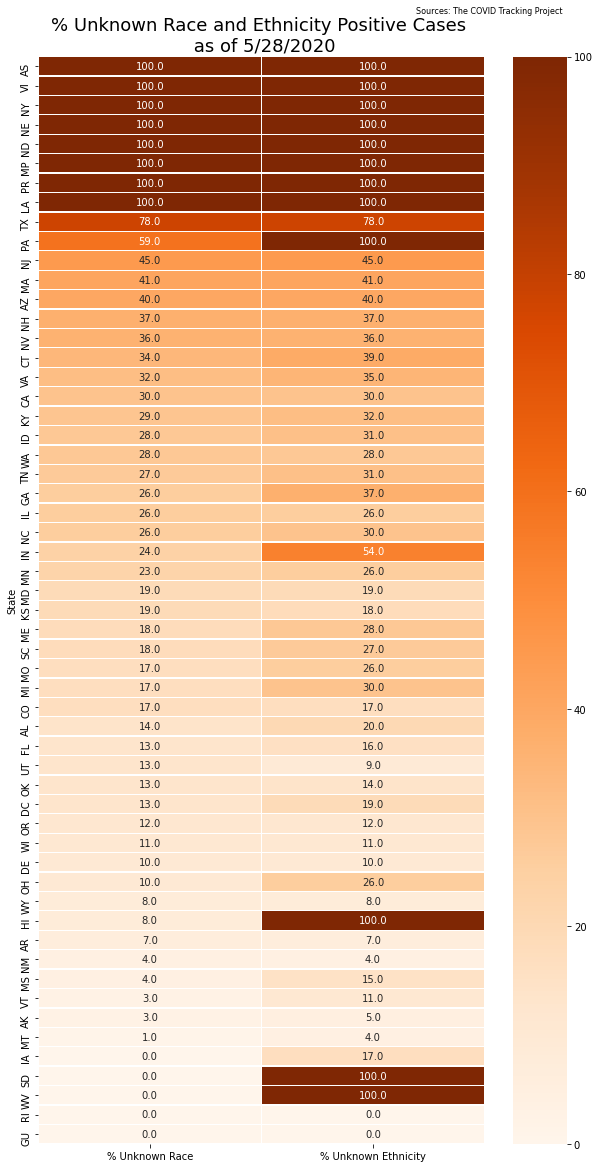

In [20]:
fig, ax = plt.subplots(figsize=(10,20))
title = "% Unknown Race and Ethnicity Positive Cases \n as of 5/28/2020"

plt.title(title, fontsize=18)

sns.heatmap(positive_unknown_state, cmap = 'Oranges', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax)

# plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project"
plt.gcf().text(.65, .91, textstr, fontsize=8)

# textstr = "US Census Population Estimates"
# plt.gcf().text(.70, .90, textstr, fontsize=8)

# textstr = "Created by: Heain Yee"
# plt.gcf().text(.65, .89, textstr, fontsize=8)

plt.savefig("images/%UnknownPositiveCases")

plt.show()

In [21]:
positive_states = positive_df.copy()
positive_states = positive_states.drop(["State", "Update Time (Et)", "% Unk."], axis = 1)
positive_states.fillna(0, inplace = True)

for column in positive_states.columns:
    positive_states[column] = positive_states[column].astype('float')

new_col = ['Total',
 'White',
 'Black',
 'LatinX / Hispanic',
 'Asian',
 'AIAN',
 'NHPI',
 'Two or more',
 'Other',
 'Unknown Race',
 'Hispanic',
 'Non-Hispanic',
 'Unknown Ethnicity']

positive_states.columns = new_col
positive_states
# positive_states = positive_states[pop_columns[1:]]

positive_us = pd.DataFrame(positive_states.sum()).T

positive_us ["ID"] = ["# Known Positive"]
cols = list(positive_us.columns.values)
cols = cols[-1:] + cols[:-1]
positive_us = positive_us[cols]

positive_us = positive_us.append(pd.Series(), ignore_index=True)
positive_us

,ID,Total,White,Black,LatinX / Hispanic,Asian,AIAN,NHPI,Two or more,Other,Unknown Race,Hispanic,Non-Hispanic,Unknown Ethnicity
0,# Known Positive,"1,690,064.00","355,939.00","198,672.00","197,064.00","32,259.00","9,974.00","2,342.00","8,509.00","73,140.00","810,068.00","261,901.00","539,699.00","388,379.00"
1,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [22]:
for element in race_pop_us.columns:
    values = (race_pop_us[element]).values
    positive_us.loc[[1], element] = values[0]

for element in eth_pop_us.columns:
    values = (eth_pop_us[element]).values
    positive_us.loc[[1], element] = values[0]

positive_us = positive_us.drop(["LatinX / Hispanic", "Unknown Race", "Unknown Ethnicity"], axis = 1)
    
positive_us

,ID,Total,White,Black,Asian,AIAN,NHPI,Two or more,Other,Hispanic,Non-Hispanic
0,# Known Positive,"1,690,064.00","355,939.00","198,672.00","32,259.00","9,974.00","2,342.00","8,509.00","73,140.00","261,901.00","539,699.00"
1,# US,"322,903,030.00","206,723,250.00","40,130,920.00","17,421,159.00","2,264,689.00","549,504.00","8,490,244.00","3,391,445.00","57,517,935.00","265,385,095.00"


In [23]:
positive_us = positive_us.append({"ID": "% Known Positive"}, ignore_index = True)
positive_us = positive_us.append({"ID": "% US"}, ignore_index = True)
positive_us

,ID,Total,White,Black,Asian,AIAN,NHPI,Two or more,Other,Hispanic,Non-Hispanic
0,# Known Positive,"1,690,064.00","355,939.00","198,672.00","32,259.00","9,974.00","2,342.00","8,509.00","73,140.00","261,901.00","539,699.00"
1,# US,"322,903,030.00","206,723,250.00","40,130,920.00","17,421,159.00","2,264,689.00","549,504.00","8,490,244.00","3,391,445.00","57,517,935.00","265,385,095.00"
2,% Known Positive,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,% US,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [24]:
for column in positive_us.columns:
    if column != "ID":
        values = (positive_us[column]/positive_us['Total']).values
        positive_us.loc[[2], column] = values[0]*100
        positive_us.loc[[3], column] = values[1]*100
        
positive_us

,ID,Total,White,Black,Asian,AIAN,NHPI,Two or more,Other,Hispanic,Non-Hispanic
0,# Known Positive,"1,690,064.00","355,939.00","198,672.00","32,259.00","9,974.00","2,342.00","8,509.00","73,140.00","261,901.00","539,699.00"
1,# US,"322,903,030.00","206,723,250.00","40,130,920.00","17,421,159.00","2,264,689.00","549,504.00","8,490,244.00","3,391,445.00","57,517,935.00","265,385,095.00"
2,% Known Positive,100.00,21.06,11.76,1.91,0.59,0.14,0.50,4.33,15.50,31.93
3,% US,100.00,64.02,12.43,5.40,0.70,0.17,2.63,1.05,17.81,82.19


In [25]:
positive_us_total = positive_us["Total"][0]/positive_us["Total"][1]*100000
positive_us_total

positive_us["Total"][0], positive_us["Total"][1], positive_us_total

(1690064.0, 322903030.0, 523.396760940893)

In [26]:
# i = 0
# for column in positive_unknown_us.columns:
#     if column != "ID":
#         positive_unknown_us.loc[[2], column] = race_array[i]*US_pop
#         positive_unknown_us.loc[[3], column] = race_array[i]*100
        
#         i = i+1
# positive_unknown_us

In [27]:
positive_us_T = positive_us.copy()
positive_us_T = positive_us_T.T.rename_axis('ID').reset_index()

positive_us_T.columns = positive_us_T.iloc[0]
positive_us_T = positive_us_T.drop([0]).set_index("ID")
# positive_unknown_us_T = positive_unknown_us_T[["ID","% Known Positive", "% US"]]
positive_us_T = positive_us_T.drop(["Total"])

positive_us_T["Difference %"] = positive_us_T["% US"]- positive_us_T["% Known Positive"]
positive_us_T["Affected per 100000"] = positive_us_T["# Known Positive"]/positive_us_T["# US"]*100000

positive_us_T_percap = positive_us_T[['# Known Positive', '# US', 'Affected per 100000']]
positive_us_T_percap = positive_us_T_percap.sort_values("Affected per 100000", ascending = False)

positive_us_T_rep = positive_us_T[['% Known Positive','% US','Difference %']]
positive_us_T_rep = positive_us_T_rep.sort_values("Difference %", ascending = False)

In [28]:
positive_us_T_percap

,# Known Positive,# US,Affected per 100000
ID,,,
Other,"73,140.00","3,391,445.00","2,156.60"
Black,"198,672.00","40,130,920.00",495.06
Hispanic,"261,901.00","57,517,935.00",455.34
AIAN,"9,974.00","2,264,689.00",440.41
NHPI,"2,342.00","549,504.00",426.20
Non-Hispanic,"539,699.00","265,385,095.00",203.36
Asian,"32,259.00","17,421,159.00",185.17
White,"355,939.00","206,723,250.00",172.18
Two or more,"8,509.00","8,490,244.00",100.22


In [29]:
positive_us_T_rep

,% Known Positive,% US,Difference %
ID,,,
Non-Hispanic,31.93,82.19,50.25
White,21.06,64.02,42.96
Asian,1.91,5.40,3.49
Hispanic,15.50,17.81,2.32
Two or more,0.50,2.63,2.13
Black,11.76,12.43,0.67
AIAN,0.59,0.70,0.11
NHPI,0.14,0.17,0.03
Other,4.33,1.05,-3.28


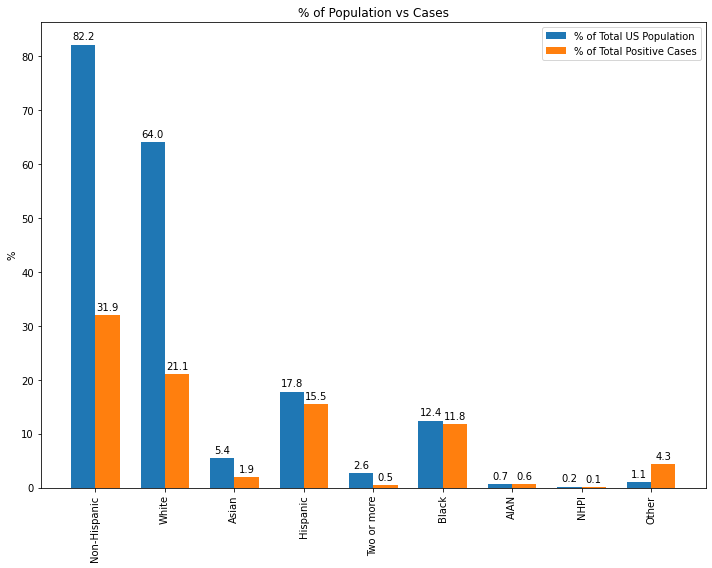

In [30]:
percent_chart = positive_us_T.sort_values("Difference %", ascending = False).reset_index()
percent_chart

labels = percent_chart["ID"]
us = percent_chart["% US"]
positives = percent_chart["% Known Positive"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, us, width, label='% of Total US Population')
rects2 = ax.bar(x + width/2, positives, width, label='% of Total Positive Cases')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% of Population vs Cases')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("images/%PopulationvsCases")

plt.show()

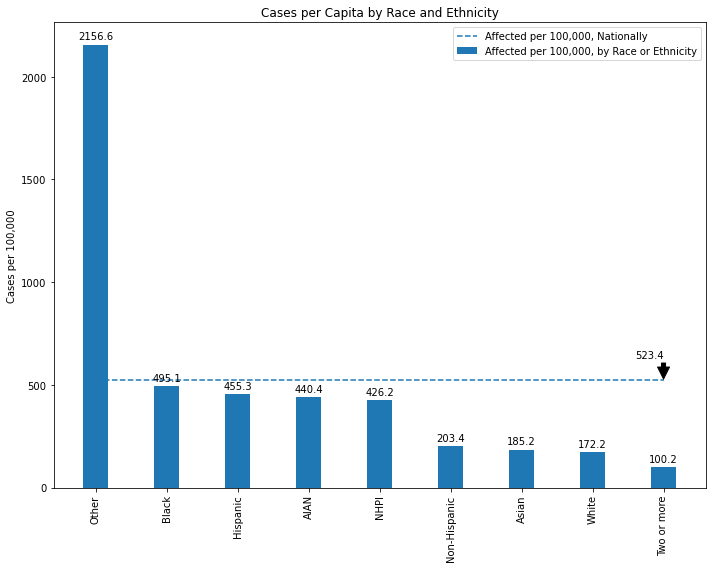

In [31]:
percap_chart = positive_us_T.sort_values("Affected per 100000", ascending = False).reset_index()

labels = percap_chart["ID"]
affected = percap_chart["Affected per 100000"]

x = np.arange(len(labels))  # the label locations

y_mean = [positive_us_total]*len(x)

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x, affected, width, label='Affected per 100,000, by Race or Ethnicity')
mean_line = ax.plot(x,y_mean, label='Affected per 100,000, Nationally', linestyle='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases per 100,000')
ax.set_title('Cases per Capita by Race and Ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

ax.annotate('{:.1f}'.format(positive_us_total),
            xy=(len(x)-1, positive_us_total), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')


fig.tight_layout()

plt.savefig("images/CasesAffectedperCapita")

plt.show()

# Death Rate Heat Map

In [32]:
dr_data = data

positive_index = dr_data.columns.get_loc("Positives") - 1
death_index = dr_data.columns.get_loc("Deaths") - 1
negative_index = dr_data.columns.get_loc("Negatives") - 1
last_index = negative_index + (negative_index - death_index)

dr_data_df = dr_data.iloc[:, np.r_[1:last_index]]

dr_data_df = dr_data_df.iloc[:, :-1]

dr_data_df.columns = dr_data_df.iloc[1]
dr_data_df = dr_data_df.rename(columns = {dr_data_df.columns[0]: "State"})
dr_data_df = dr_data_df.drop([0,1])
dr_data_present_df = data_df.drop_duplicates(subset = "State", keep = "first")

start_date = '4/1/2020'
end_date = '4/30/2020'

dr_data_past_df = dr_data_df.sort_values("State")
# test = test.dropna(axis = 0, subset = ["Update Time (Et)"])

date_filter = (dr_data_past_df["Update Time (Et)"] > start_date) & (dr_data_past_df["Update Time (Et)"] <= end_date)

dr_data_past_df = dr_data_past_df.loc[date_filter]
dr_data_past_df = dr_data_past_df.sort_values(["Update Time (Et)"], ascending = False)
dr_data_past_df = dr_data_past_df.drop_duplicates(subset = "State", keep = "first")
dr_data_past_df = dr_data_past_df.sort_values(["State"])
dr_data_past_df
# dr_data_present_df

1,State,Update Time,Source,Update Time (Et),Last Check,Checker,DC,Total,Known White,Known Black,...,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown
450,AK,NaN,NaN,4/29 14:00,4/29 22:45,SPA,AM,355,206,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,AL,NaN,NaN,4/29 0:00,4/29 23:04,SPA,AM,6925,3186,2646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,AR,NaN,NaN,4/29 11:00,4/29 23:27,SPA,AM,3192,1591,1026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,AZ,NaN,NaN,4/29 0:00,4/29 23:32,SPA,AM,7202,2046,240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,CA,NaN,NaN,4/28 0:00,4/29 23:29,BL,AM,46500,8339,1977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,CO,NaN,NaN,4/29 0:00,4/29 23:21,BL,AM,14758,7460,1131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,CT,NaN,NaN,4/29 12:00,4/29 23:07,BL,AM,26767,8504,3105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,DC,NaN,NaN,4/28 0:00,4/29 22:59,BL,AM,4106,703,2037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,DE,NaN,NaN,4/28 0:00,4/29 22:49,BL,AFG,4655,1184,1292,...,283,NaN,NaN,993,NaN,2959,18%,931,12993,2959
460,FL,NaN,NaN,4/29 9:51,4/30 0:08,BL,ESK,32318,16146,5745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
dr_data_present_df
# Differenecs between Present and Past:
#  'AS',
#  'GU',
#  'MP',
#  'ND',
#  'NE',
#  'NV',
#  'PR',
#  'SD',
#  'VI',

1,State,Update Time,Source,Update Time (Et),Last Check,Checker,DC,Total,Known White,Known Black,...,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown
2,AK,NaN,NaN,5/27 14:15,5/27 22:16,JDL,BL,412,264,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,NaN,NaN,5/27 0:00,5/27 22:29,JDL,RV,16032,6273,6730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AR,NaN,NaN,5/27 19:13,5/27 22:43,JDL,RV,6277,3012,2194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AS,NaN,NaN,NaN,5/27 22:45,JDL,RV,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AZ,NaN,NaN,5/27 0:00,5/27 22:53,JDL,RV,17262,3548,555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CA,NaN,NaN,5/27 0:00,5/27 23:15,JDL,RV,98980,14640,3797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CO,NaN,NaN,5/27 0:00,5/27 23:20,JDL,RV,24767,8661,1483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CT,NaN,NaN,5/26 20:30,5/27 23:22,JDL,RV,41288,13951,5248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,DC,NaN,NaN,5/26 0:00,5/27 23:33,JDL,RV,8406,1293,3839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,DE,NaN,NaN,5/26 18:00,5/27 22:36,SPA,RV,9096,2645,2430,...,696,NaN,NaN,NaN,2679,10164,22%,3369,32792,10164


In [34]:
drop_columns = ["Update Time", "Source", "Last Check", "Checker", "DC"]

positive_present_df = dr_data_present_df.iloc[:, np.r_[0:positive_index, positive_index:death_index]]
# positive_df = positive_df.iloc[:, :-1]
positive_present_df = positive_present_df.drop(drop_columns, axis = 1)

death_present_df = dr_data_present_df.iloc[:, np.r_[0:positive_index, death_index:negative_index]]
# death_df = death_df.iloc[:, :-1]
death_present_df = death_present_df.drop(drop_columns, axis = 1)

positive_past_df = dr_data_past_df.iloc[:, np.r_[0:positive_index, positive_index:death_index]]
# positive_df = positive_df.iloc[:, :-1]
positive_past_df = positive_past_df.drop(drop_columns, axis = 1).reset_index(drop = True)

death_past_df = dr_data_past_df.iloc[:, np.r_[0:positive_index, death_index:negative_index]]
# death_df = death_df.iloc[:, :-1]
death_past_df = death_past_df.drop(drop_columns, axis = 1).reset_index(drop = True)

In [35]:
dataframes = [positive_past_df, positive_present_df, death_past_df, death_present_df]
framenames = ["Past Positive Cases", "Present Positive Cases", "Past Deaths", "Present Deaths"]

new_col = ['Total',
 'White',
 'Black',
 'LatinX / Hispanic',
 'Asian',
 'AIAN',
 'NHPI',
 'Two or more',
 'Other',
 'Unknown Race',
 'Hispanic',
 'Non-Hispanic',
 'Unknown Ethnicity']

deathrate_df = pd.DataFrame(index=new_col)
i = 0

for frame in dataframes:    
    test = frame.iloc[:, 2:]
    test = test.drop(["% Unk."], axis = 1)
    test.columns = new_col

    for column in test.columns:
        test[column] = test[column].astype('float')
    
    deathrate_df[framenames[i]] = test.sum()
    i = i +1

deathrate_df = deathrate_df.drop(["LatinX / Hispanic"])

In [36]:
deathrate_df["Past Case to Death Rate (End of April)"] = deathrate_df["Past Deaths"]/deathrate_df["Past Positive Cases"]*100
deathrate_df["Present Case to Death Rate (End of May)"] = deathrate_df["Present Deaths"]/deathrate_df["Present Positive Cases"]*100
deathrate_df

,Past Positive Cases,Present Positive Cases,Past Deaths,Present Deaths,Past Case to Death Rate (End of April),Present Case to Death Rate (End of May)
Total,"581,274.00","1,690,064.00","51,807.00","94,218.00",8.91,5.57
White,"181,363.00","355,939.00","19,048.00","43,767.00",10.50,12.30
Black,"98,583.00","198,672.00","10,364.00","20,988.00",10.51,10.56
Asian,"12,588.00","32,259.00","1,666.00","3,756.00",13.23,11.64
AIAN,"3,948.00","9,974.00",121.00,287.00,3.06,2.88
NHPI,"1,225.00","2,342.00",37.00,63.00,3.02,2.69
Two or more,"5,767.00","8,509.00",133.00,190.00,2.31,2.23
Other,"24,370.00","73,140.00","1,138.00","3,421.00",4.67,4.68
Unknown Race,"192,240.00","810,068.00","12,457.00","8,939.00",6.48,1.10
Hispanic,"81,485.00","261,901.00","2,476.00","13,565.00",3.04,5.18


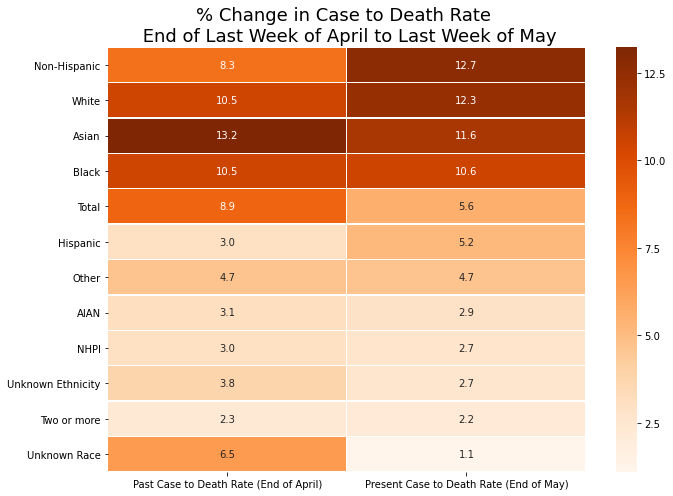

In [37]:
fig, ax = plt.subplots(figsize=(10,7))
title = "% Change in Case to Death Rate \n End of Last Week of April to Last Week of May"
chart_df = deathrate_df[["Past Case to Death Rate (End of April)", "Present Case to Death Rate (End of May)"]]
chart_df = chart_df.sort_values("Present Case to Death Rate (End of May)", ascending = False)

plt.title(title, fontsize=18)

sns.heatmap(chart_df, cmap = 'Oranges', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax)

# plt.xlabel ("final date of the week")

# textstr = "Sources: The COVID Tracking Project"
# plt.gcf().text(.65, .91, textstr, fontsize=8)

# textstr = "US Census Population Estimates"
# plt.gcf().text(.70, .90, textstr, fontsize=8)

# textstr = "Created by: Heain Yee"
# plt.gcf().text(.65, .89, textstr, fontsize=8)
fig.tight_layout()

plt.savefig("images/%CasetoDeathbyRace")

plt.show()

In [38]:
# positive_past_df
# positive_present_df

In [39]:
# death_past_df
# death_present_df

In [40]:
# under_pop_deaths = death_df.copy()

# under_pop_deaths = under_pop_deaths.drop(["Update Time (Et)", "% Unk."], axis = 1)
# # positive_states.fillna(0, inplace = True)

# # for column in under_pop_deaths.columns:
# #     under_pop_deaths[column] = under_pop_deaths[column].astype('float')

# new_col = ['State', 'Total',
#  'White',
#  'Black',
#  'LatinX / Hispanic',
#  'Asian',
#  'AIAN',
#  'NHPI',
#  'Two or more',
#  'Other',
#  'Unknown Race',
#  'Hispanic',
#  'Non-Hispanic',
#  'Unknown Ethnicity']

# under_pop_deaths.columns = new_col
# under_pop_deaths.fillna(0, inplace = True)

# converge = pop_data_df.columns.tolist()
# converge.remove("State Name")

# under_pop_deaths = under_pop_deaths[converge]

# for column in under_pop_deaths.columns:
#     if column != 'State':
#         under_pop_deaths[column] = under_pop_deaths[column].astype('float')
#         for index, row in under_pop_deaths.iterrows():
#             if under_pop_deaths[column][index] == 0:
#                 state_name = under_pop_deaths["State"][index]
#                 population = pop_data_df.loc[pop_data_df["State"] == under_pop_deaths["State"][index]][column]
#                 if population.empty == False:
#                     under_pop_deaths[column][index] = population.values[0].astype('float')
# #                 print (under_pop_deaths[column][index])
# #                 print (pop_data_df.loc[pop_data_df["State"] == under_pop_deaths["State"][index]][column])
#             else:
#                 under_pop_deaths[column][index] = "N/A"
# under_pop_deaths

In [41]:
# positive_df

In [42]:
# pop_data_df